# Binary Preprocessing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

## Importing dataset

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Stock,Average,Return,Max,Min,Day,y
0,2006-01-03,0.710553,0.707904,0.705324,0.714383,5307000,21.399132,A,0.711972,NaN,1,5,0.166667,NaN
1,2006-01-04,0.715643,0.716495,0.723974,0.717436,4195800,21.456621,A,0.720884,0.002687,1,5,0.333333,2.0
2,2006-01-05,0.712250,0.738488,0.726687,0.747286,4835400,22.018748,A,0.733739,0.026198,1,5,0.500000,3.0
3,2006-01-06,0.747879,0.749485,0.748389,0.753392,6146300,22.133729,A,0.752507,0.005222,1,5,0.666667,2.0
4,2006-01-09,0.752969,0.749828,0.759580,0.750000,4082800,22.069850,A,0.755849,-0.002886,1,5,0.000000,2.0


## Creating binary input

In [4]:
def binarization(group):
    if not "Binary" in group.columns:
        group.loc[:,"Binary"] = group.loc[:,"Close"] - group.loc[:,"Open"]
        return group

In [5]:
df = df.groupby("Stock").apply(binarization)

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Stock,Average,Return,Max,Min,Day,y,Binary
0,2006-01-03,0.710553,0.707904,0.705324,0.714383,5307000,21.399132,A,0.711972,NaN,1,5,0.166667,NaN,0.003830
1,2006-01-04,0.715643,0.716495,0.723974,0.717436,4195800,21.456621,A,0.720884,0.002687,1,5,0.333333,2.0,0.001793
2,2006-01-05,0.712250,0.738488,0.726687,0.747286,4835400,22.018748,A,0.733739,0.026198,1,5,0.500000,3.0,0.035037
3,2006-01-06,0.747879,0.749485,0.748389,0.753392,6146300,22.133729,A,0.752507,0.005222,1,5,0.666667,2.0,0.005513
4,2006-01-09,0.752969,0.749828,0.759580,0.750000,4082800,22.069850,A,0.755849,-0.002886,1,5,0.000000,2.0,-0.002969


In [7]:
df.loc[:,"Binary"] = df.loc[:,"Binary"].apply(lambda binary : 0 if binary == 0 else (1 if binary > 0 else 2))
df.loc[:,'Binary'] = df.Binary.apply(lambda num : format(num, '02b'))

In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Stock,Average,Return,Max,Min,Day,y,Binary
0,2006-01-03,0.710553,0.707904,0.705324,0.714383,5307000,21.399132,A,0.711972,NaN,1,5,0.166667,NaN,01
1,2006-01-04,0.715643,0.716495,0.723974,0.717436,4195800,21.456621,A,0.720884,0.002687,1,5,0.333333,2.0,01
2,2006-01-05,0.712250,0.738488,0.726687,0.747286,4835400,22.018748,A,0.733739,0.026198,1,5,0.500000,3.0,01
3,2006-01-06,0.747879,0.749485,0.748389,0.753392,6146300,22.133729,A,0.752507,0.005222,1,5,0.666667,2.0,01
4,2006-01-09,0.752969,0.749828,0.759580,0.750000,4082800,22.069850,A,0.755849,-0.002886,1,5,0.000000,2.0,10


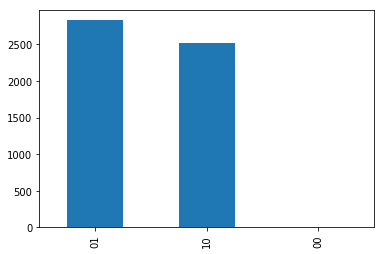

In [9]:
df.Binary.value_counts().plot(kind='bar')

## Adding day to the encoding
* 000: Monday
* 001: Tuesday
* 010: Wednesday
* 011: Thursday
* 100: Friday

In [10]:
df.loc[:,'Date'] = pd.to_datetime(df.loc[:,'Date'])
df.loc[:,'Day_bin'] = df.Date.dt.dayofweek.apply(lambda day : format(day, '03b'))

In [11]:
df.Day_bin.head()

0    001
1    010
2    011
3    100
4    000
Name: Day_bin, dtype: object

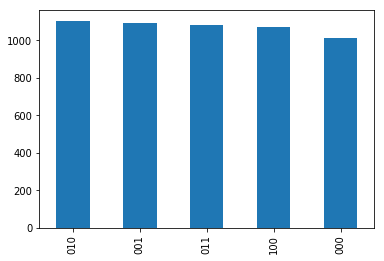

In [12]:
df.Day_bin.value_counts().plot(kind='bar')

# Creating lags

In [13]:
num_lags = 5

def create_lags(group):
    for i in range(1,num_lags+1):
        group.loc[group.iloc[i:].index,'Lag%i'%i] = group.loc[group.iloc[:-i].index,'Binary'].values
    return group

In [14]:
df = df.groupby('Stock').apply(create_lags)

In [15]:
df.groupby('Stock').apply(lambda g : print(g.iloc[:7].loc[:,'Binary':]));

  Binary Day_bin Lag1 Lag2 Lag3 Lag4 Lag5
0     01     001  NaN  NaN  NaN  NaN  NaN
1     01     010   01  NaN  NaN  NaN  NaN
2     01     011   01   01  NaN  NaN  NaN
3     01     100   01   01   01  NaN  NaN
4     10     000   01   01   01   01  NaN
5     01     001   10   01   01   01   01
6     01     010   01   10   01   01   01
  Binary Day_bin Lag1 Lag2 Lag3 Lag4 Lag5
0     01     001  NaN  NaN  NaN  NaN  NaN
1     01     010   01  NaN  NaN  NaN  NaN
2     01     011   01   01  NaN  NaN  NaN
3     01     100   01   01   01  NaN  NaN
4     10     000   01   01   01   01  NaN
5     01     001   10   01   01   01   01
6     01     010   01   10   01   01   01
     Binary Day_bin Lag1 Lag2 Lag3 Lag4 Lag5
1259     01     001  NaN  NaN  NaN  NaN  NaN
1260     01     010   01  NaN  NaN  NaN  NaN
1261     01     011   01   01  NaN  NaN  NaN
1262     10     100   01   01   01  NaN  NaN
1263     10     000   10   01   01   01  NaN
1264     10     001   10   10   01   01   01
1265     10  

## Combining binary values

In [16]:
df.loc[:,'All_values'] = df.Day_bin
for i in range(1,num_lags+1):
    df.loc[:,'All_values'] = df.All_values + df.loc[:,'Lag%i' % i].astype(str)

In [17]:
df.iloc[:10]

,Date,Open,High,Low,Close,Volume,Adj Close,Stock,Average,Return,...,Day,y,Binary,Day_bin,Lag1,Lag2,Lag3,Lag4,Lag5,All_values
0,2006-01-03,0.710553,0.707904,0.705324,0.714383,5307000,21.399132,A,0.711972,NaN,...,0.166667,NaN,01,001,NaN,NaN,NaN,NaN,NaN,001nannannannannan
1,2006-01-04,0.715643,0.716495,0.723974,0.717436,4195800,21.456621,A,0.720884,0.002687,...,0.333333,2.0,01,010,01,NaN,NaN,NaN,NaN,01001nannannannan
2,2006-01-05,0.712250,0.738488,0.726687,0.747286,4835400,22.018748,A,0.733739,0.026198,...,0.500000,3.0,01,011,01,01,NaN,NaN,NaN,0110101nannannan
3,2006-01-06,0.747879,0.749485,0.748389,0.753392,6146300,22.133729,A,0.752507,0.005222,...,0.666667,2.0,01,100,01,01,01,NaN,NaN,100010101nannan
4,2006-01-09,0.752969,0.749828,0.759580,0.750000,4082800,22.069850,A,0.755849,-0.002886,...,0.000000,2.0,10,000,01,01,01,01,NaN,00001010101nan
5,2006-01-10,0.739396,0.756701,0.748728,0.765265,3010800,22.357301,A,0.755249,0.013025,...,0.166667,3.0,01,001,10,01,01,01,01,0011001010101
6,2006-01-11,0.764846,0.759450,0.765683,0.764925,2874900,22.350913,A,0.766561,-0.000286,...,0.333333,2.0,01,010,01,10,01,01,01,0100110010101
7,2006-01-12,0.756362,0.751546,0.751441,0.738806,5484300,21.859053,A,0.752250,-0.022006,...,0.500000,1.0,10,011,01,01,10,01,01,0110101100101
8,2006-01-13,0.735324,0.730928,0.731434,0.729986,4101500,21.692970,A,0.734510,-0.007598,...,0.666667,2.0,10,100,10,01,01,10,01,1001001011001
9,2006-01-17,0.719715,0.714089,0.721601,0.723202,3496600,21.565215,A,0.722170,-0.005889,...,0.166667,2.0,01,001,10,10,01,01,10,0011010010110


## Return to predict

In [18]:
def create_y(group):
    group.loc[group.iloc[:-1].index,"Return_to_pred"] = group.loc[group.iloc[1:].index,'y'].values
    return group

In [19]:
df = df.groupby('Stock').apply(create_y)

In [20]:
df.groupby('Stock').apply(lambda group : print(group.iloc[-3:].loc[:,'Binary':]));

     Binary Day_bin Lag1 Lag2 Lag3 Lag4 Lag5     All_values  Return_to_pred
1256     01     010   10   01   01   01   01  0101001010101             2.0
1257     10     011   01   10   01   01   01  0110110010101             2.0
1258     01     100   10   01   10   01   01  1001001100101             NaN
     Binary Day_bin Lag1 Lag2 Lag3 Lag4 Lag5     All_values  Return_to_pred
1256     01     010   10   01   01   01   01  0101001010101             2.0
1257     10     011   01   10   01   01   01  0110110010101             2.0
1258     01     100   10   01   10   01   01  1001001100101             NaN
     Binary Day_bin Lag1 Lag2 Lag3 Lag4 Lag5     All_values  Return_to_pred
2515     01     010   01   10   10   10   01  0100110101001             2.0
2516     10     011   01   01   10   10   10  0110101101010             1.0
2517     10     100   10   01   01   10   10  1001001011010             NaN
     Binary Day_bin Lag1 Lag2 Lag3 Lag4 Lag5     All_values  Return_to_pred
3774     01 

## Exporting files
The last entry is not used because the return from the last one is used in the second last

In [25]:
df.groupby('Stock').apply(lambda group : group.loc[group.iloc[num_lags:-1].index,['All_values','Return_to_pred']].reset_index(drop=True).to_csv('csv/%s_binary.csv' % group.name));

In [22]:
df.iloc[:10]

,Date,Open,High,Low,Close,Volume,Adj Close,Stock,Average,Return,...,y,Binary,Day_bin,Lag1,Lag2,Lag3,Lag4,Lag5,All_values,Return_to_pred
0,2006-01-03,0.710553,0.707904,0.705324,0.714383,5307000,21.399132,A,0.711972,NaN,...,NaN,01,001,NaN,NaN,NaN,NaN,NaN,001nannannannannan,2.0
1,2006-01-04,0.715643,0.716495,0.723974,0.717436,4195800,21.456621,A,0.720884,0.002687,...,2.0,01,010,01,NaN,NaN,NaN,NaN,01001nannannannan,3.0
2,2006-01-05,0.712250,0.738488,0.726687,0.747286,4835400,22.018748,A,0.733739,0.026198,...,3.0,01,011,01,01,NaN,NaN,NaN,0110101nannannan,2.0
3,2006-01-06,0.747879,0.749485,0.748389,0.753392,6146300,22.133729,A,0.752507,0.005222,...,2.0,01,100,01,01,01,NaN,NaN,100010101nannan,2.0
4,2006-01-09,0.752969,0.749828,0.759580,0.750000,4082800,22.069850,A,0.755849,-0.002886,...,2.0,10,000,01,01,01,01,NaN,00001010101nan,3.0
5,2006-01-10,0.739396,0.756701,0.748728,0.765265,3010800,22.357301,A,0.755249,0.013025,...,3.0,01,001,10,01,01,01,01,0011001010101,2.0
6,2006-01-11,0.764846,0.759450,0.765683,0.764925,2874900,22.350913,A,0.766561,-0.000286,...,2.0,01,010,01,10,01,01,01,0100110010101,1.0
7,2006-01-12,0.756362,0.751546,0.751441,0.738806,5484300,21.859053,A,0.752250,-0.022006,...,1.0,10,011,01,01,10,01,01,0110101100101,2.0
8,2006-01-13,0.735324,0.730928,0.731434,0.729986,4101500,21.692970,A,0.734510,-0.007598,...,2.0,10,100,10,01,01,10,01,1001001011001,2.0
9,2006-01-17,0.719715,0.714089,0.721601,0.723202,3496600,21.565215,A,0.722170,-0.005889,...,2.0,01,001,10,10,01,01,10,0011010010110,3.0
